# Netflix Exploratory Data Analysis

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the Netflix dataset to uncover insights about content distribution, growth, and popularity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Loading the Dataset

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

## 2. Type Distribution (Movies vs TV Shows)

C:\Users\isak\AppData\Local\Temp\ipykernel_23260\1256656731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


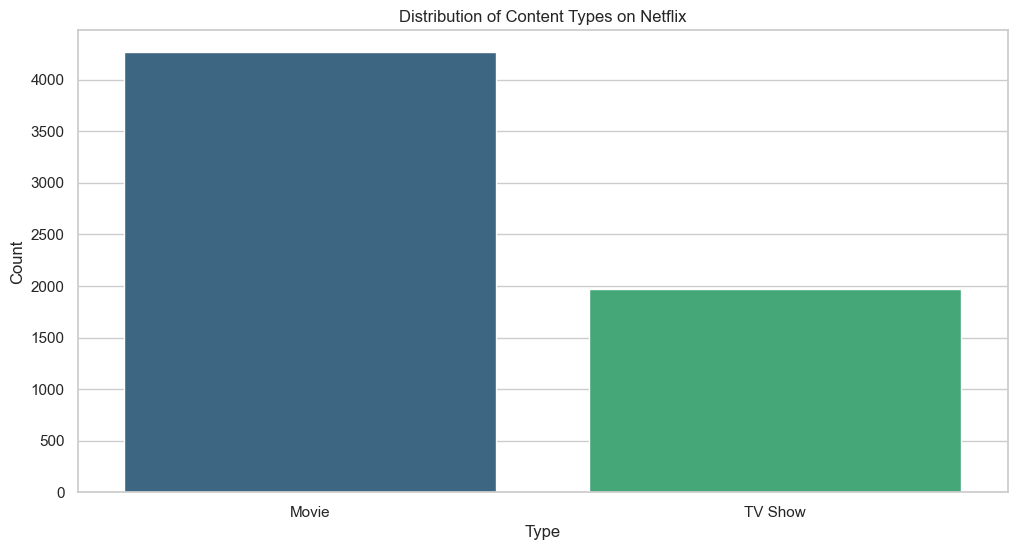

In [3]:
plt.figure()
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## 3. Content Growth Over Years

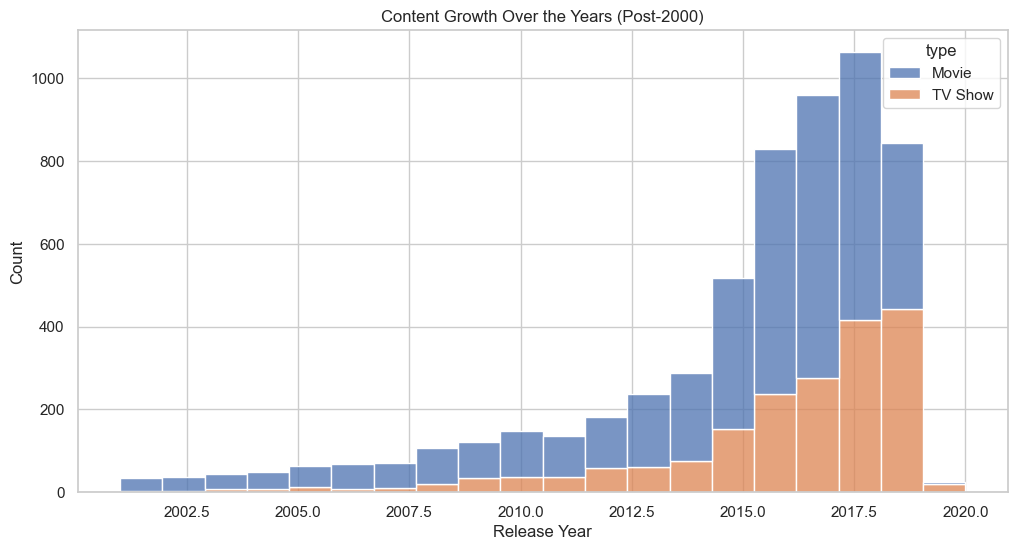

In [4]:
plt.figure()
df_growth = df[df['release_year'] > 2000]
sns.histplot(data=df_growth, x='release_year', hue='type', multiple='stack', bins=20)
plt.title('Content Growth Over the Years (Post-2000)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

## 4. Top 10 Genres

C:\Users\isak\AppData\Local\Temp\ipykernel_23260\2082218492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


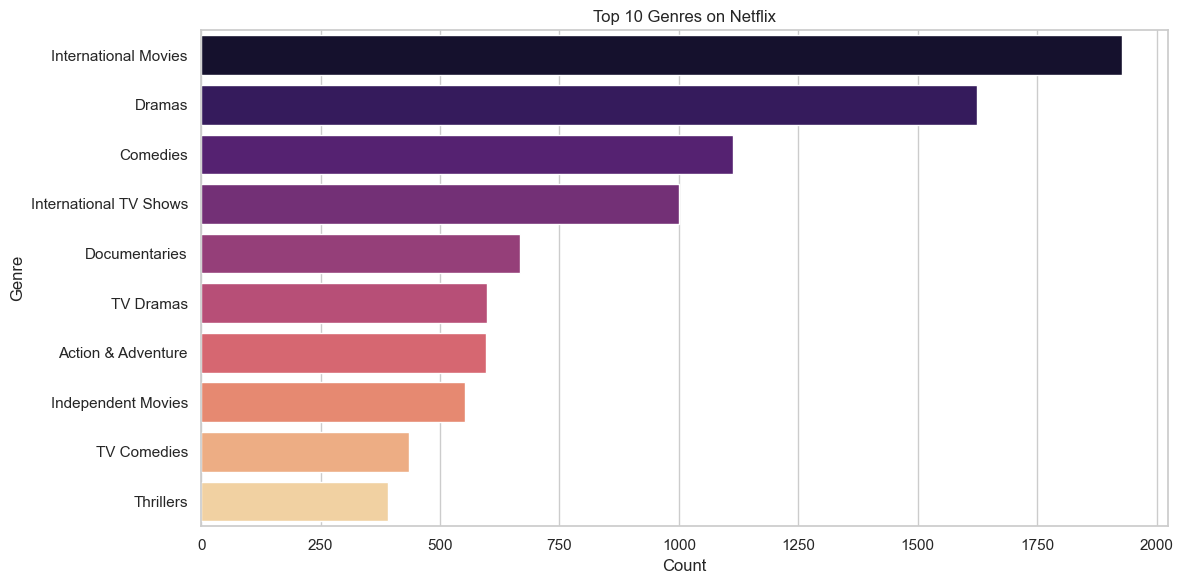

In [5]:
plt.figure()
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 5. Top 10 Producing Countries

C:\Users\isak\AppData\Local\Temp\ipykernel_23260\500947510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


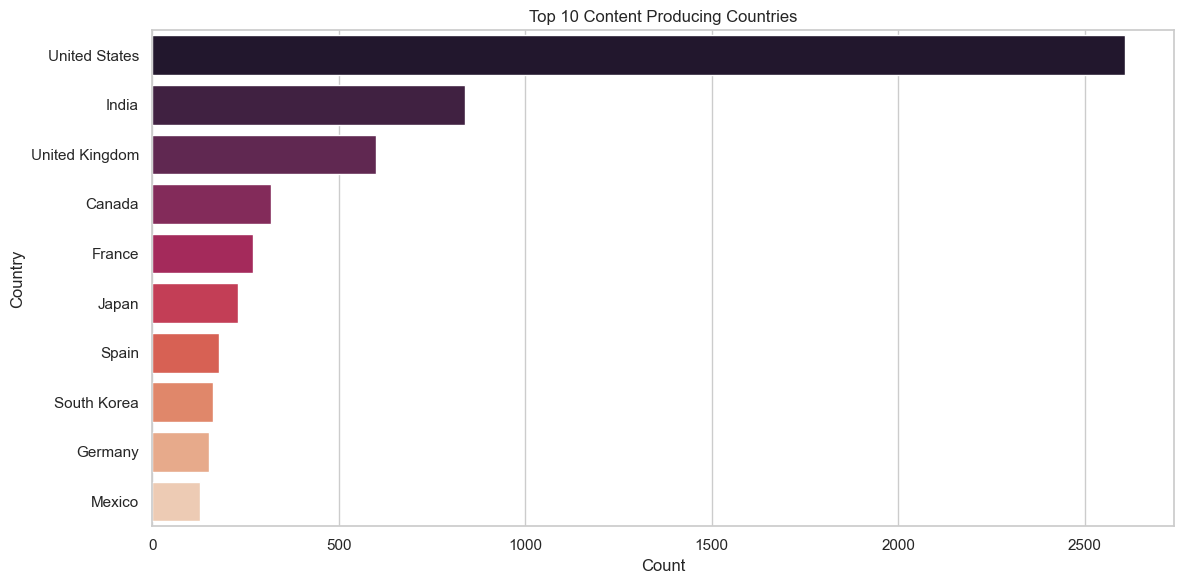

In [6]:
plt.figure()
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 6. Rating Distribution

C:\Users\isak\AppData\Local\Temp\ipykernel_23260\1318466590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cubehelix')


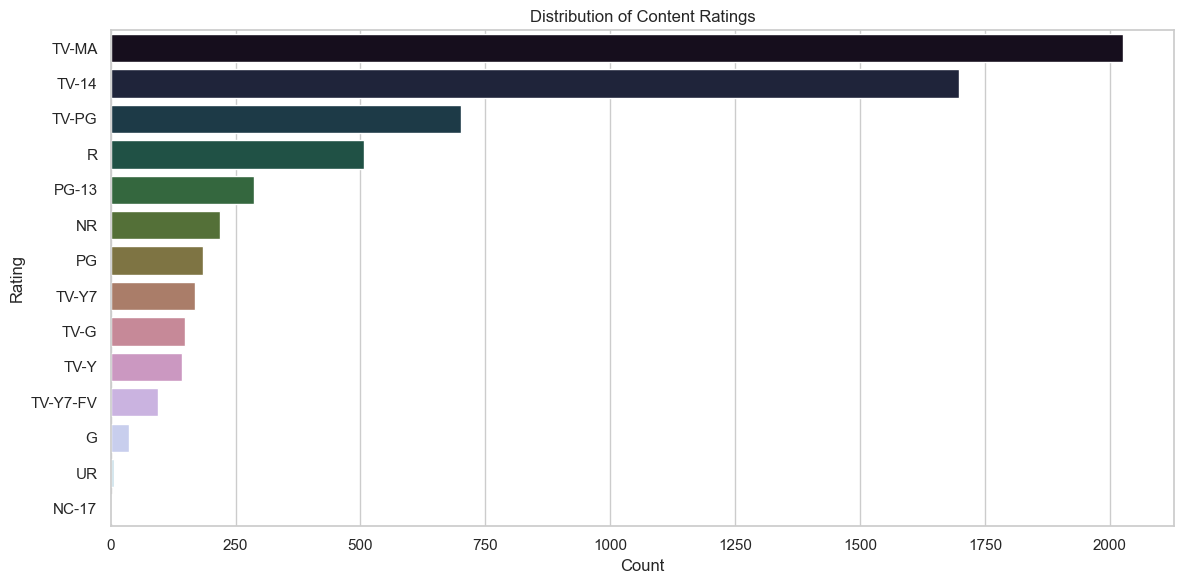

In [7]:
plt.figure()
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()